<h1>Spark Funds Investment Analysis</h1>
<h4>@Author: Barun Kumar Mishra</h4>
<h4>@Date: 1st Mar 2020</h4>
<h4>@Version: 1.0 </h4>
<h4>@Description:  Spark Funds wants to mke investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively</h4>

<h1>Importing All Python libraries</h1>

In [126]:
import pandas as pd
from openpyxl.workbook import Workbook
import sys
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np

<h1>Importing data from input sheets</h1>

In [127]:
df_companies=pd.read_csv('companies.txt',delimiter='\t',engine='python',encoding='iso-8859-1')
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [128]:
df_companies.columns=['permalink','name','homepage_url','category_list','status','country_code','state_code','region','city','founded_at']
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [129]:
df_rounds=pd.read_csv('rounds2.csv',delimiter=',',engine='python',encoding='iso-8859-1')
df_rounds.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [130]:
df_rounds.columns=['permalink','funding_round_permalink','funding_round_type','funding_round_code','funded_at','raised_amount_usd']
df_rounds

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


<h1>How many unique companies are present in rounds?</h1>

In [131]:
#How many unique companies are present in round2?


df_rounds['permalink']=df_rounds['permalink'].str.lower()#Best Practice to change the data in to lowercase

uniquecompanies=df_rounds['permalink'].unique()
print(uniquecompanies.size)

66370


In [132]:
df_rounds.isnull().sum()
#permalink is not having null value so the unique() is giving the number of companies present in round2 is 66370

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

<h1>How many unique companies are present in companies?</h1>

In [133]:
#How many unique companies are present in companies?
df_companies.head()

df_companies['permalink']=df_companies['permalink'].str.lower()#Best Practice to change to lowercase
uniquecompanies=df_companies['name'].unique()
print(uniquecompanies.size)


66103


<h1>Data Cleaning</h1>

In [134]:
df_companies.info()
df_companies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [135]:
#From the out put got to konw the permalink and status is not any NaN values, founded_at is having many NaN Values
#We can drop founded_at column as this column having large number of Null values and not a critical column for analysis
df_companies=df_companies.drop('founded_at',axis=1)
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign


In [136]:
#As country_code and categroy_list columns are important for analysis removing the rows in which the values are null
df_companies=df_companies[~df_companies.category_list.isnull()]
df_companies=df_companies[~df_companies.country_code.isnull()]
df_companies.isnull().sum()

permalink           0
name                1
homepage_url     3337
category_list       0
status              0
country_code        0
state_code       1536
region           1039
city             1037
dtype: int64

In [137]:
#So the important columns are not Null and we can proceed with analyzing the data
df_companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong
...,...,...,...,...,...,...,...,...,...
66361,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split


In [138]:
df_rounds.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [139]:
round(100*(df_rounds.isnull().sum()/len(df_rounds.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [140]:
#72% of the data in funding_round_code is null or NaN. So dropping the column funding_round_code
round(100*(df_rounds.isnull().sum()/len(df_rounds.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [141]:
df_rounds=df_rounds.drop('funding_round_code',axis=1)#72% of funding round code is having NaN value so dropping this column
df_rounds.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [142]:
#Removing NaN Values from important columns
df_rounds=df_rounds[~df_rounds.raised_amount_usd.isnull()]
df_rounds=df_rounds[~df_rounds.permalink.isnull()]
df_rounds.isnull().sum()

permalink                  0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [143]:
#In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
#Checking what and all columns are having unique elements then those columns can be unique

df_companies.head()

df_companies.isnull().sum()

permalink           0
name                1
homepage_url     3337
category_list       0
status              0
country_code        0
state_code       1536
region           1039
city             1037
dtype: int64

In [144]:
#Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
#Yes
df_rounds[~df_rounds['permalink'].isin(df_companies['permalink'])]


,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,01-04-2010,43923865.0
66,/organization/10k-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,04-09-2015,100000.0
95,/organization/1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,22-11-2013,150267.0
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,01-09-2012,500000.0
...,...,...,...,...,...
114752,/organization/zuggi,/funding-round/e8fa50bcf4086dc88c07a901258b8b4f,seed,20-06-2011,40000.0
114835,/organization/zuumtel,/funding-round/785ed8667f9d950257f94089050d6eb0,angel,16-09-2014,200000.0
114836,/organization/zuumtel,/funding-round/d5d97d7c8a5e923715b15495d44e7cb8,seed,01-04-2013,100000.0
114849,"/organization/zwayo-""on-demand-valet-parking""",/funding-round/eb5163bb6feea4384121e27699bb7b25,seed,01-09-2014,60000.0


In [145]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 

df_companies

master_frame=pd.merge(df_companies,df_rounds, on='permalink',how='left')
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,NaN,NaN,NaN,NaN
4,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97598,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0
97599,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0
97600,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
97601,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0


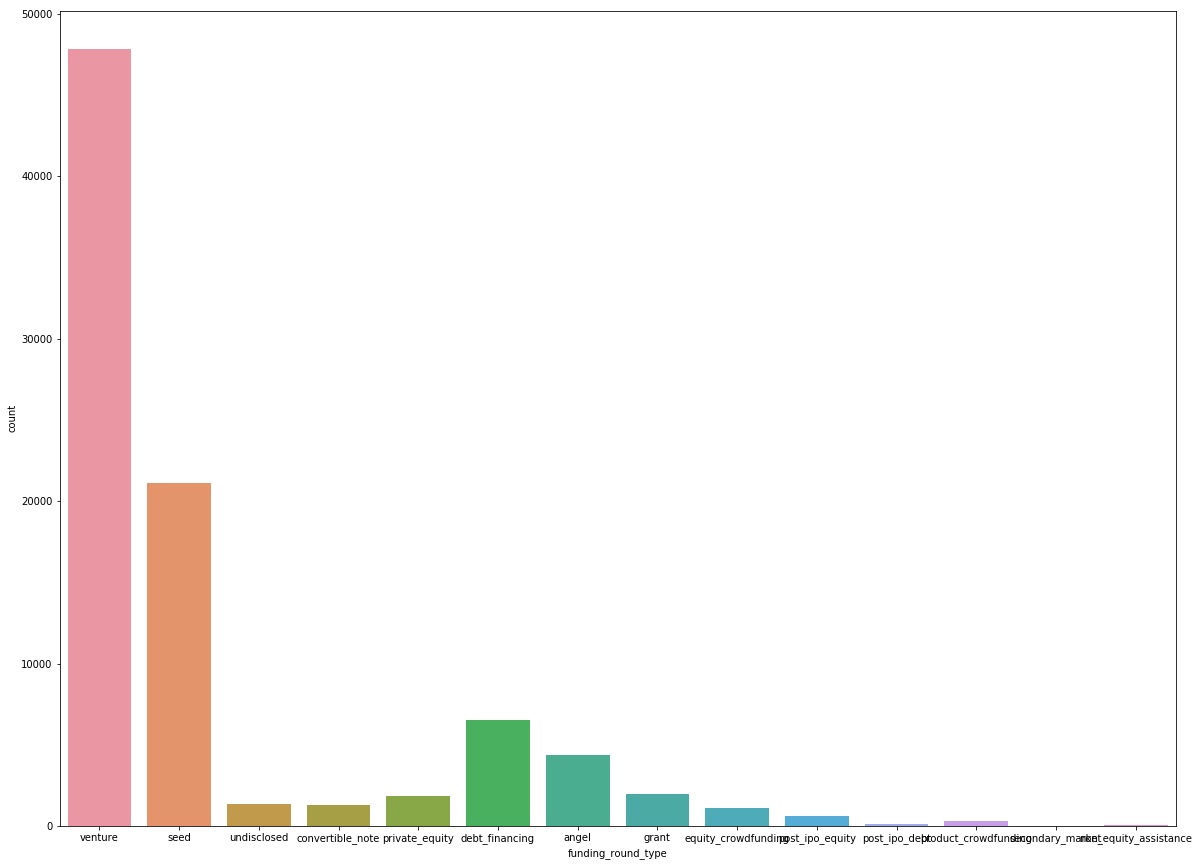

In [146]:
# Number of investment on each funding_round_type
plot.figure(figsize=(20, 15))
sns.countplot(x="funding_round_type", data=master_frame)
plot.show()

In [147]:
#Name the merged frame master_frame. How many observations are present in master_frame?
#(97603 rows, 13 columns)#After cleaning the data the number of rows present in the master_frame is 97603
master_frame.shape

(97603, 13)

In [148]:
# Converting the amounts of 'raised_amount_usd' column from $ to million $ for easier calculation and understandability.
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda val: round(val/1000000,3))
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000
3,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,NaN,NaN,NaN,NaN
4,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97598,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,0.007
97599,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,0.033
97600,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,0.041
97601,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,0.033


In [149]:
master_frame.groupby('funding_round_type').size()

funding_round_type
angel                     4400
convertible_note          1320
debt_financing            6506
equity_crowdfunding       1128
grant                     1939
non_equity_assistance       60
post_ipo_debt              151
post_ipo_equity            598
private_equity            1820
product_crowdfunding       330
secondary_market            28
seed                     21095
undisclosed               1345
venture                  47809
dtype: int64

In [150]:
#Average funding amount of Venture Type
#Average funding amount of angel type
#Average funding amount of seed type
#Average funding amount of private equity type
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt            169.451801
secondary_market          84.438536
private_equity            73.938484
post_ipo_equity           66.077052
debt_financing            17.167651
undisclosed               15.891662
venture                   11.724223
grant                      4.512693
product_crowdfunding       1.353221
convertible_note           1.337184
angel                      0.971575
seed                       0.747793
equity_crowdfunding        0.509903
non_equity_assistance      0.480767
Name: raised_amount_usd, dtype: float64

In [151]:
#Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, 
#which investment type is the most suitable for it? Venture
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5.0,15.0,inclusive=True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

In [152]:
#Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, 
#which investment type is the most suitable for it? 
#Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.
master_frame.loc[master_frame.funding_round_type==master_frame['funding_round_type']].groupby('funding_round_type',as_index=False).agg({'raised_amount_usd':['min','max','count','sum']})

investment_type=pd.DataFrame(master_frame.loc[master_frame.funding_round_type==master_frame['funding_round_type']].groupby('funding_round_type').agg({'raised_amount_usd':['min','max','count','sum']}))
investment_type
# print(investment_type.columns)
investment_type.sort_values(by=[('raised_amount_usd',   'sum')],ascending=False)

raised_amount_usd                              
                                    min        max  count         sum
funding_round_type                                                   
venture                           0.000  17600.000  47809  560523.374
private_equity                    0.000   4745.460   1820  134568.040
debt_financing                    0.000  21271.935   6506  111692.735
post_ipo_equity                   0.000   3200.000    598   39514.077
post_ipo_debt                     0.070   5800.000    151   25587.222
undisclosed                       0.000   4630.000   1345   21374.285
seed                              0.000    200.000  21095   15774.699
grant                             0.000    750.000   1939    8750.112
angel                             0.000    494.512   4400    4274.929
secondary_market                  0.002    680.612     28    2364.279
convertible_note                  0.000    150.000   1320    1765.083
equity_crowdfunding               0.000     27.400   1128     575.171
product_crowdfunding              0.000     52.000    330     446.563
non_equity_assistance             0.000     15.000     60      28.846

In [153]:
#From the able table we knew that the funding_round_type is where we want to invest as the this is most suitable.
#REmoving all other funding_round_type as they are not needed for analysis
master_frame_Venture=master_frame[master_frame.funding_round_type=='venture']
master_frame_Venture

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719
8,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97587,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7.992
97590,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,0.141
97592,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8.500
97593,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2.687


<h1>CheckPoint 3: Country Analysis - Part 2 (Country analysis)</h1>

In [154]:
#CheckPoint 3: Country Analysis - Part 2 (Country analysis)
#Now that you know the type of investment suited for Spark Funds, Let's narrow down the countries.

#master_frame
countrycode=pd.DataFrame(master_frame.loc[master_frame.country_code==master_frame['country_code']].groupby('country_code',as_index=False).agg({'raised_amount_usd':['min','max','count','sum']}))


In [155]:
countrycode

country_code raised_amount_usd                         
                               min      max count       sum
0            ALB             0.134    0.143     2     0.277
1            ARE             0.002  825.000    94  1569.619
2            ARG             0.000   30.000   297   362.357
3            ARM             0.100   18.788     4    26.818
4            AUS             0.000  400.000   644  3833.708
..           ...               ...      ...   ...       ...
132          VEN             0.010    0.427    20     2.642
133          VNM             0.000  100.000    20   363.621
134          ZAF             0.000  339.000    69  1074.068
135          ZMB             0.020    0.500     2     0.520
136          ZWE             0.030   10.000     2    10.030

[137 rows x 5 columns]

In [156]:
type(countrycode)


pandas.core.frame.DataFrame

In [157]:
print(countrycode.columns)

MultiIndex([(     'country_code',      ''),
            ('raised_amount_usd',   'min'),
            ('raised_amount_usd',   'max'),
            ('raised_amount_usd', 'count'),
            ('raised_amount_usd',   'sum')],
           )


In [158]:
#1. Spark Funds wants to see the top nine countries which have received the highest total funding
top9=countrycode.sort_values(by=[('raised_amount_usd', 'sum')],ascending=False).head(9)

top9

country_code raised_amount_usd                              
                               min        max  count         sum
130          USA             0.000  21271.935  61692  665782.060
23           CHN             0.005   4745.460   1911   75207.056
42           GBR             0.000    915.000   4990   32436.810
55           IND             0.000   1500.000   1630   27383.834
20           CAN             0.000   1000.000   2598   18304.104
108          RUS             0.000   5800.000    583   11277.448
31           DEU             0.000    667.500   1032    9970.517
59           ISR             0.000    500.000   1346    9655.727
41           FRA             0.000    500.000   1443    9022.653

In [159]:
#Identify the top three English-speaking countries in the data frame top9
# Analysing the Top 3 English-Speaking Countries
#1. Top English-Speaking country(USA)
#2. Second English-Speaking country(GBR)
#3. Third English-Speaking country(IND)

In [160]:
top9=pd.DataFrame(top9['country_code'])
top9

,country_code
130,USA
23,CHN
42,GBR
55,IND
20,CAN
108,RUS
31,DEU
59,ISR
41,FRA


<h1>Checkpoint 4: Sector Analysis</h1>

In [161]:
#Checkpoint 4: Sector Analysis 
#This is the third goal of analysis -- Sector analysis
#1. Extract the primary sector of each category list from the category_list column
#2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors
#(Note that 'Others' is also considered one of the main sectors)
df_mapping=pd.read_csv('mapping.csv',delimiter=',',engine='python',encoding='iso-8859-1')
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [162]:
#Removing NaN
df_mapping=df_mapping[~df_mapping.category_list.isnull()]
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [163]:
#Giving Proper name to columns
df_mapping.columns=['category_list','Automotive_Sports','Blanks','Cleantech_OR_Semiconductors','Entertainment','Health','Manufacturing','News_Search_Messaging','Others','Social_Finance_Analytics_dvertising']
df_mapping

,category_list,Automotive_Sports,Blanks,Cleantech_OR_Semiconductors,Entertainment,Health,Manufacturing,News_Search_Messaging,Others,Social_Finance_Analytics_dvertising
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [164]:
df_mapping.isna().sum()

category_list                          0
Automotive_Sports                      0
Blanks                                 0
Cleantech_OR_Semiconductors            0
Entertainment                          0
Health                                 0
Manufacturing                          0
News_Search_Messaging                  0
Others                                 0
Social_Finance_Analytics_dvertising    0
dtype: int64

In [165]:
df_mapping.groupby('category_list').category_list.count()

category_list
0notechnology                 1
0tural Language Processing    1
0tural Resources              1
0vigation                     1
3D                            1
                             ..
Young Adults                  1
iOS                           1
iPad                          1
iPhone                        1
mHealth                       1
Name: category_list, Length: 687, dtype: int64

In [166]:
#Removing the Blanks category_list as this is a not a valid category
df_mapping['category_list']=df_mapping['category_list'].str.replace('0','na')
df_mapping.groupby('category_list').category_list.count()

category_list
3D                             1
3D Printing                    1
3D Technology                  1
Accounting                     1
Active Lifestyle               1
                              ..
mHealth                        1
nanotechnology                 1
natural Language Processing    1
natural Resources              1
navigation                     1
Name: category_list, Length: 687, dtype: int64

In [167]:
category_to_mainsector=pd.melt(df_mapping, id_vars=['category_list'],var_name=['main_sector'])
category_to_mainsector=category_to_mainsector[category_to_mainsector.value==1]
category_to_mainsector

,category_list,main_sector,value
7,Adventure Travel,Automotive_Sports,1
13,Aerospace,Automotive_Sports,1
44,Auto,Automotive_Sports,1
45,Automated Kiosk,Automotive_Sports,1
46,Automotive,Automotive_Sports,1
...,...,...,...
6112,Social Recruiting,Social_Finance_Analytics_dvertising,1
6113,Social Television,Social_Finance_Analytics_dvertising,1
6114,Social Travel,Social_Finance_Analytics_dvertising,1
6125,Stock Exchanges,Social_Finance_Analytics_dvertising,1


In [168]:
master_frame_Venture
master_frame_Venture_top9=master_frame_Venture[master_frame_Venture['country_code'].isin(top9['country_code'])]
master_frame_Venture_top9.country_code.unique()

array(['IND', 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'RUS', 'DEU', 'ISR'],
      dtype=object)

In [169]:
master_frame_Venture_top9

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719
8,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97579,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14.220
97580,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,0.555
97590,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,0.141
97592,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8.500


In [170]:
#need to work on this

#Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). 
#For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media
#You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.
#Below code to split those category_list
# Creating containing the first category as it the primary category.

# primary_sector = master_frame_Venture_top9['category_list'].str.split('|',n=1,expand=True)

# primary_sector

master_frame_Venture_top9['Primary_Sector'] =master_frame_Venture_top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])
master_frame_Venture_top9

C:\development\conda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,Media
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000,Curated Web
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719,Biotechnology
8,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000,Analytics
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97579,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14.220,Biotechnology
97580,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,0.555,Biotechnology
97590,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,0.141,E-Commerce
97592,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8.500,Biotechnology


In [171]:
#analyzing mapping dataframe
df_mapping

,category_list,Automotive_Sports,Blanks,Cleantech_OR_Semiconductors,Entertainment,Health,Manufacturing,News_Search_Messaging,Others,Social_Finance_Analytics_dvertising
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [172]:
#Extracting the sectors where value is 1, Before that we need to change the order of the columns
df_mapping.columns

Index(['category_list', 'Automotive_Sports', 'Blanks',
       'Cleantech_OR_Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News_Search_Messaging', 'Others',
       'Social_Finance_Analytics_dvertising'],
      dtype='object')

In [173]:
df_mapping_melted=pd.melt(df_mapping, id_vars=['category_list'],value_vars=['Automotive_Sports', 'Blanks',
       'Cleantech_OR_Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News_Search_Messaging', 'Others',
       'Social_Finance_Analytics_dvertising'])

df_mapping_melted

,category_list,variable,value
0,3D,Automotive_Sports,0
1,3D Printing,Automotive_Sports,0
2,3D Technology,Automotive_Sports,0
3,Accounting,Automotive_Sports,0
4,Active Lifestyle,Automotive_Sports,0
...,...,...,...
6178,Wholesale,Social_Finance_Analytics_dvertising,0
6179,Wine And Spirits,Social_Finance_Analytics_dvertising,0
6180,Wireless,Social_Finance_Analytics_dvertising,0
6181,Women,Social_Finance_Analytics_dvertising,0


In [174]:
# We need only those column entries which have 1 in the respective cells.
df_mapping_melted=df_mapping_melted[df_mapping_melted.value==1]
df_mapping_melted

,category_list,variable,value
7,Adventure Travel,Automotive_Sports,1
13,Aerospace,Automotive_Sports,1
44,Auto,Automotive_Sports,1
45,Automated Kiosk,Automotive_Sports,1
46,Automotive,Automotive_Sports,1
...,...,...,...
6112,Social Recruiting,Social_Finance_Analytics_dvertising,1
6113,Social Television,Social_Finance_Analytics_dvertising,1
6114,Social Travel,Social_Finance_Analytics_dvertising,1
6125,Stock Exchanges,Social_Finance_Analytics_dvertising,1


In [175]:
df_mapping_melted=df_mapping_melted.rename(columns={'category_list':'Primary_Sectors','variable':'Main_Sector'})#Renaming the column Value
df_mapping_melted=df_mapping_melted.drop('value',axis=1)#Dropping not necessary column
df_mapping_melted
df_mapping_melted.isnull().sum()

Primary_Sectors    0
Main_Sector        0
dtype: int64

In [176]:
master_frame_Venture_top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,Media
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000,Curated Web
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719,Biotechnology
8,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000,Analytics
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700,Analytics


In [177]:
df_mapping_melted.head()

,Primary_Sectors,Main_Sector
7,Adventure Travel,Automotive_Sports
13,Aerospace,Automotive_Sports
44,Auto,Automotive_Sports
45,Automated Kiosk,Automotive_Sports
46,Automotive,Automotive_Sports


In [178]:
#Expected Results: Code for a merged data frame with each primary sector mapped to its main sector
#(the primary sector should be present in a separate column)

master_frame_Venture_top9=pd.merge(master_frame_Venture_top9,df_mapping_melted,how="left",left_on="Primary_Sector",right_on="Primary_Sectors")


In [179]:
master_frame_Venture_top9

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Primary_Sectors,Main_Sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,Media,Media,Entertainment
1,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000,Curated Web,Curated Web,News_Search_Messaging
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719,Biotechnology,Biotechnology,Cleantech_OR_Semiconductors
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000,Analytics,Analytics,Social_Finance_Analytics_dvertising
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700,Analytics,Analytics,Social_Finance_Analytics_dvertising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44044,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14.220,Biotechnology,Biotechnology,Cleantech_OR_Semiconductors
44045,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,0.555,Biotechnology,Biotechnology,Cleantech_OR_Semiconductors
44046,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,0.141,E-Commerce,E-Commerce,Others
44047,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8.500,Biotechnology,Biotechnology,Cleantech_OR_Semiconductors


In [180]:
master_frame_Venture_top9=master_frame_Venture_top9.drop('Primary_Sectors',axis=1)
master_frame_Venture_top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,Media,Entertainment
1,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000,Curated Web,News_Search_Messaging
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719,Biotechnology,Cleantech_OR_Semiconductors
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000,Analytics,Social_Finance_Analytics_dvertising
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700,Analytics,Social_Finance_Analytics_dvertising


In [181]:
len(master_frame_Venture_top9[master_frame_Venture_top9['Main_Sector'].isnull()])

176

In [182]:
master_frame_Venture_top9=master_frame_Venture_top9[~(master_frame_Venture_top9['Main_Sector'].isnull())]

In [183]:
len(master_frame_Venture_top9[master_frame_Venture_top9['Main_Sector'].isnull()])

0

In [184]:
master_frame_Venture_top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,Media,Entertainment
1,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000,Curated Web,News_Search_Messaging
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719,Biotechnology,Cleantech_OR_Semiconductors
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000,Analytics,Social_Finance_Analytics_dvertising
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700,Analytics,Social_Finance_Analytics_dvertising


In [185]:
master_frame_Venture_top9_Rang5to15m = master_frame_Venture_top9[master_frame_Venture_top9['raised_amount_usd'].between(5.0,15.0,inclusive=True)]
master_frame_Venture_top9_Rang5to15m.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000,Media,Entertainment
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900,Analytics,Social_Finance_Analytics_dvertising
6,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000,Apps,News_Search_Messaging
13,/organization/1001-menus,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,/funding-round/645b4cd895450b8e0268027cd7813047,venture,04-11-2015,6.603,Local Businesses,Others
16,/organization/1001pharmacies-com,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,09-07-2015,8.900,Cosmetics,Health


Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

All the columns of the master_frame along with the primary sector and the main sector

The total number (or count) of investments for each main sector in a separate column

The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.

Identify the top three English-speaking countries in the data frame top9
Analysing the Top 3 English-Speaking Countries
1. Top English-Speaking country(USA)
2. Second English-Speaking country(GBR)
3. Third English-Speaking country(IND)

In [186]:
D1=master_frame_Venture_top9_Rang5to15m[master_frame_Venture_top9_Rang5to15m['country_code']=='USA']
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900,Analytics,Social_Finance_Analytics_dvertising
6,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000,Apps,News_Search_Messaging
28,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999,Service Providers,Others
31,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15.000,Manufacturing,Manufacturing
32,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5.000,Manufacturing,Manufacturing


In [187]:
D2=master_frame_Venture_top9_Rang5to15m[master_frame_Venture_top9_Rang5to15m['country_code']=='GBR']
D2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
138,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5.500,Android,Social_Finance_Analytics_dvertising
312,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8.468,Content Creators,Entertainment
313,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10.000,Content Creators,Entertainment
338,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.000,Media,Entertainment
339,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.800,Media,Entertainment


In [188]:
D3=master_frame_Venture_top9_Rang5to15m[master_frame_Venture_top9_Rang5to15m['country_code']=='IND']
D3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00,Media,Entertainment
74,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6.37,E-Commerce,Others
369,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6.41,Finance,Social_Finance_Analytics_dvertising
1067,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8.18,Entertainment,Entertainment
1449,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5.74,Finance,Social_Finance_Analytics_dvertising


The total number (or count) of investments for each main sector in a separate column

The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.

In [189]:
#1. Total number of investments (count) (Country 1)
D1.raised_amount_usd.count()

12041

In [190]:
#1. Total number of investments (count) (Country 2)
D2.raised_amount_usd.count()

620

In [191]:
#1. Total number of investments (count) (Country 3)
D3.raised_amount_usd.count()

328

In [192]:
#2. Total amount of investment (USD) (Country 1)
D1.raised_amount_usd.sum()

107563.31800000001

In [193]:
#2. Total amount of investment (USD) (Country 2)
D2.raised_amount_usd.sum()

5380.228

In [194]:
#2. Total amount of investment (USD) (Country 3)
D3.raised_amount_usd.sum()

2949.544

In [195]:
D1_Main_Sector=D1.groupby('Main_Sector')
D2_Main_Sector=D2.groupby('Main_Sector')
D3_Main_Sector=D3.groupby('Main_Sector')

In [196]:
#3. Top sector (based on count of investments) (Country 1)
#4. Second-best sector (based on count of investments) (Country 1)
#5. Third-best sector (based on count of investments) (Country 1)
#6. Number of investments in the top sector (refer to point 3) (Country 1)
#7. Number of investments in the second-best sector (refer to point 4) (Country 1)
#8. Number of investments in the third-best sector (refer to point 5) (Country 1)
D1_Main_Sector['raised_amount_usd'].count().sort_values(ascending = False).head()

Main_Sector
Others                                 2957
Social_Finance_Analytics_dvertising    2718
Cleantech_OR_Semiconductors            2305
News_Search_Messaging                  1586
Health                                  914
Name: raised_amount_usd, dtype: int64

In [197]:
#3. Top sector (based on count of investments) (Country 2)
#4. Second-best sector (based on count of investments) (Country 2)
#5. Third-best sector (based on count of investments) (Country 2)
#6. Number of investments in the top sector (refer to point 3) (Country 2)
#7. Number of investments in the second-best sector (refer to point 4) (Country 2)
#8. Number of investments in the third-best sector (refer to point 5) (Country 2)
D2_Main_Sector['raised_amount_usd'].count().sort_values(ascending = False).head()

Main_Sector
Others                                 148
Social_Finance_Analytics_dvertising    133
Cleantech_OR_Semiconductors            128
News_Search_Messaging                   73
Entertainment                           56
Name: raised_amount_usd, dtype: int64

In [198]:
#3. Top sector (based on count of investments) (Country 3)
#4. Second-best sector (based on count of investments) (Country 3)
#5. Third-best sector (based on count of investments) (Country 3)
#6. Number of investments in the top sector (refer to point 3) (Country 3)
#7. Number of investments in the second-best sector (refer to point 4) (Country 3)
#8. Number of investments in the third-best sector (refer to point 5) (Country 3)
D3_Main_Sector['raised_amount_usd'].count().sort_values(ascending = False).head()

Main_Sector
Others                                 110
Social_Finance_Analytics_dvertising     60
News_Search_Messaging                   52
Entertainment                           33
Manufacturing                           21
Name: raised_amount_usd, dtype: int64

In [199]:
D1_Main_Sector.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900,Analytics,Social_Finance_Analytics_dvertising
6,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000,Apps,News_Search_Messaging
28,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999,Service Providers,Others
31,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15.000,Manufacturing,Manufacturing
32,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5.000,Manufacturing,Manufacturing
33,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/786f61aa9866f4471151285f5c56be36,venture,03-02-2010,5.150,Manufacturing,Manufacturing
34,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,27-03-2008,12.400,Manufacturing,Manufacturing
35,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,16-12-2010,6.000,Manufacturing,Manufacturing
41,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14.000,Software,Others
46,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5.000,Education,Others


In [200]:
#9. For the top sector count-wise (point 3), which company received the highest investment?
D1[D1['Main_Sector']=='Others'].groupby(['Main_Sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

Main_Sector  permalink                      
Others       /organization/virtustream          64.300
             /organization/capella              54.968
             /organization/pmw-technologies     54.890
             /organization/airtight-networks    54.202
             /organization/decarta              52.100
Name: raised_amount_usd, dtype: float64

In [201]:
#10. For the second-best sector count-wise (point 4), which company received the highest investment?
D2[D2['Main_Sector']=='Others'].groupby(['Main_Sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

Main_Sector  permalink                            
Others       /organization/electric-cloud             37.000
             /organization/sensage                    36.250
             /organization/enigmatic                  32.500
             /organization/silverrail-technologies    29.000
             /organization/opencloud                  27.973
Name: raised_amount_usd, dtype: float64

In [202]:

D3[D3['Main_Sector']=='Others'].groupby(['Main_Sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

Main_Sector  permalink                     
Others       /organization/firstcry-com        39.0
             /organization/myntra              38.0
             /organization/commonfloor         32.9
             /organization/pepperfry-com       28.0
             /organization/itzcash-card-ltd    25.0
Name: raised_amount_usd, dtype: float64

<h1>For point 4 (second best sector count-wise), which company received the highest investment?</h1>

In [203]:
#For point 4 (second best sector count-wise), which company received the highest investment?
D1[D1['Main_Sector']=='Social_Finance_Analytics_dvertising'].groupby(['Main_Sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

Main_Sector                          permalink                
Social_Finance_Analytics_dvertising  /organization/shotspotter    67.933
                                     /organization/demandbase     63.000
                                     /organization/intacct        61.800
                                     /organization/netbase        60.600
                                     /organization/lotame         59.700
Name: raised_amount_usd, dtype: float64

In [204]:
D2[D2['Main_Sector']=='Cleantech_OR_Semiconductors'].groupby(['Main_Sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

Main_Sector                  permalink                                                                  
Cleantech_OR_Semiconductors  /organization/eusa-pharma                                                      35.600
                             /organization/horizon-discovery                                                31.353
                             /organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29.133
                             /organization/elixent                                                          25.000
                             /organization/takeda-cambridge                                                 22.340
Name: raised_amount_usd, dtype: float64

In [205]:
D3[D3['Main_Sector']=='Social_Finance_Analytics_dvertising'].groupby(['Main_Sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

Main_Sector                          permalink                               
Social_Finance_Analytics_dvertising  /organization/manthan-systems               50.700
                                     /organization/komli-media                   28.000
                                     /organization/shopclues-com                 25.000
                                     /organization/intarvo                       21.900
                                     /organization/grameen-financial-services    21.556
Name: raised_amount_usd, dtype: float64

<h1>Checkpoint 6:Plot</h1>

In [206]:

#1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.
#This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. 
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000
3,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,NaN,NaN,NaN,NaN
4,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97598,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,0.007
97599,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,0.033
97600,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,0.041
97601,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,0.033


In [207]:
master_frame.groupby('funding_round_type').size()

funding_round_type
angel                     4400
convertible_note          1320
debt_financing            6506
equity_crowdfunding       1128
grant                     1939
non_equity_assistance       60
post_ipo_debt              151
post_ipo_equity            598
private_equity            1820
product_crowdfunding       330
secondary_market            28
seed                     21095
undisclosed               1345
venture                  47809
dtype: int64

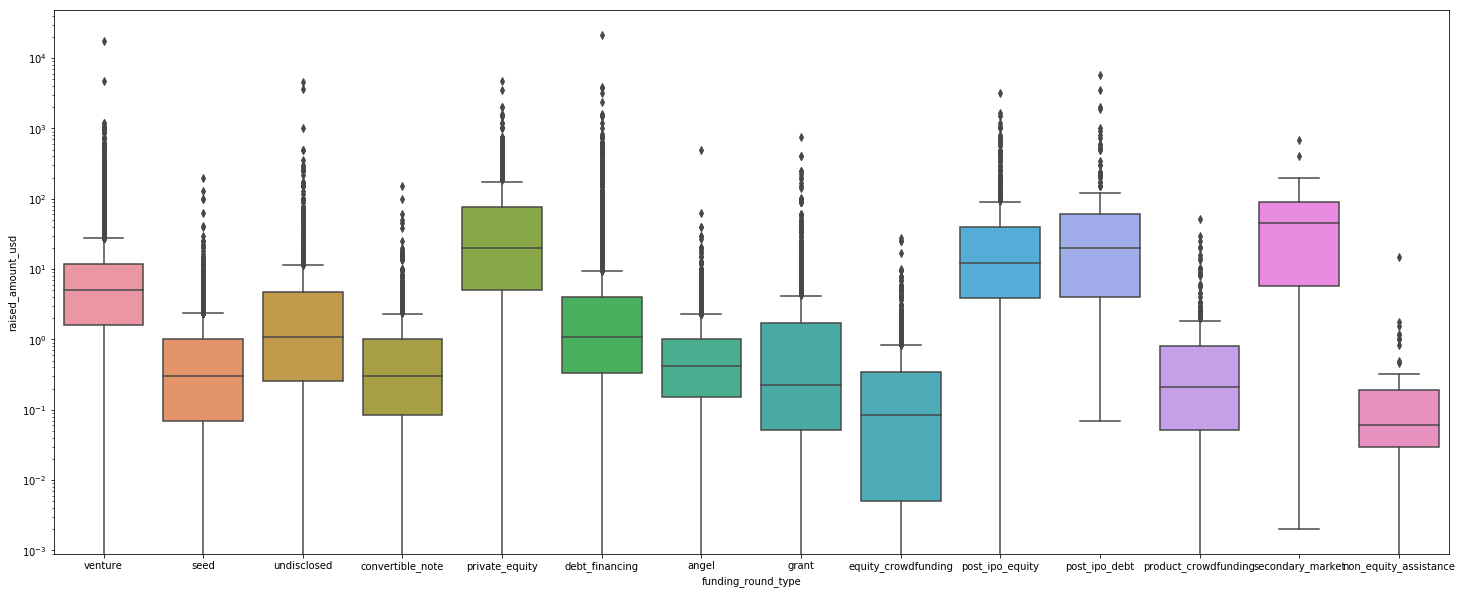

In [208]:
# boxplot of a variable across various funding categories
plot.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plot.yscale('log')
plot.show()

In [209]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['angel','venture','seed','private_equity'])]
master_frame.groupby('funding_round_type').size()

funding_round_type
angel              4400
private_equity     1820
seed              21095
venture           47809
dtype: int64

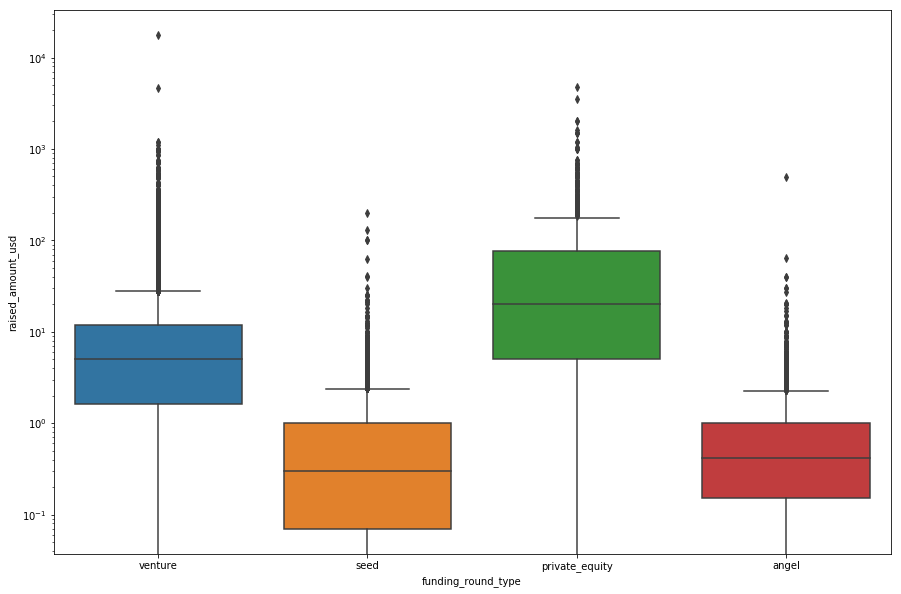

In [210]:
#A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity
plot.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plot.yscale('log')
plot.show()

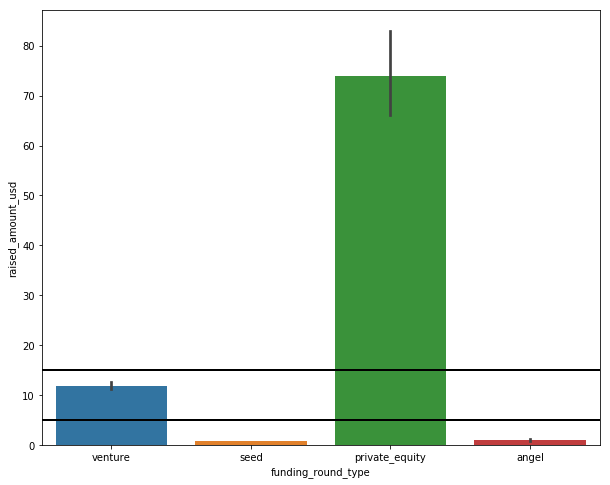

In [211]:
#the average amount of investment in each funding type.
plot.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plot.axhline(y=5, linewidth=2, color = 'k')
plot.axhline(y=15, linewidth=2, color = 'k')
plot.show()

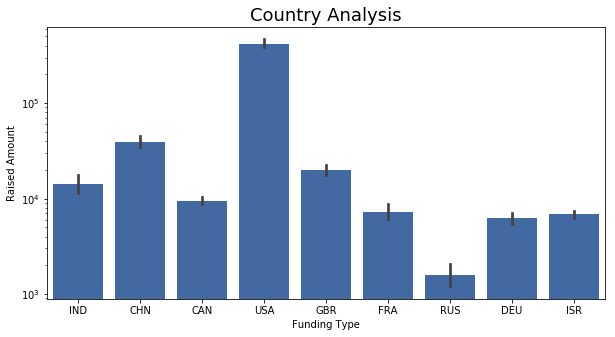

In [212]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT.
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

plot.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=master_frame_Venture_top9, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))

c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plot.show()

In [213]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart(for the chosen investment type FT). 

PlOT_D=D1[D1['Main_Sector'].isin(['Others','Social_Finance_Analytics_dvertising','Cleantech_OR_Semiconductors'])]

PlOT_D=PlOT_D.append(D2[D2['Main_Sector'].isin(['Others','Social_Finance_Analytics_dvertising','Cleantech_OR_Semiconductors'])], ignore_index=True)

PlOT_D=PlOT_D.append(D3[D3['Main_Sector'].isin(['Others','Social_Finance_Analytics_dvertising','News_Search_Messaging '])], ignore_index=True)
PlOT_D.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,Main_Sector
0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900,Analytics,Social_Finance_Analytics_dvertising
1,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999,Service Providers,Others
2,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14.000,Software,Others
3,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5.000,Education,Others
4,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10.000,Education,Others


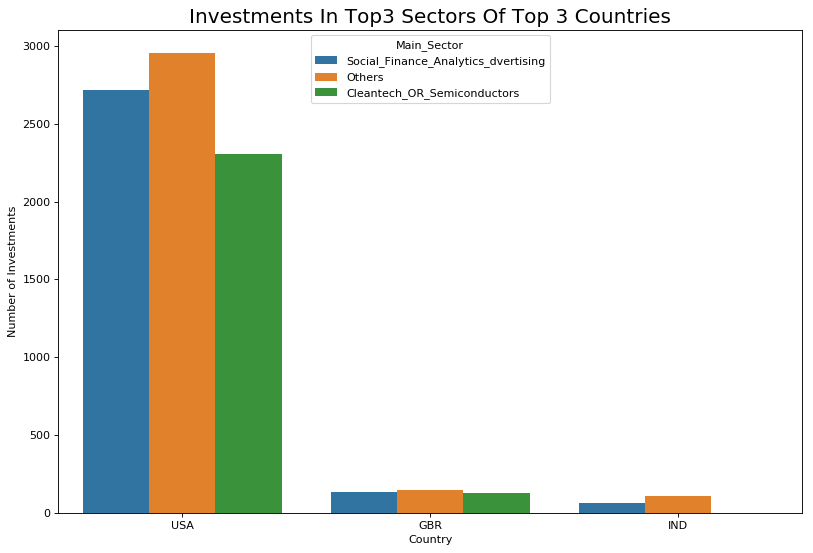

In [214]:
plot.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

s=sns.barplot(x='country_code', y='raised_amount_usd', hue="Main_Sector", data=PlOT_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments In Top3 Sectors Of Top 3 Countries',fontsize =18)
plot.show()